<div style="text-align: center; padding: 20px; background-color: #000000; border-radius: 10px; margin: 20px 0;">
    <h1 style="color: #008080 	;">the sunken ship ‘RMS Lusitania Data Analysis</h1>
    <hr style="border: 2px solid #008080;">
</div>

The dataset we will be using in this notebook contains information about the passengers of the sunken ship ‘RMS Lusitania’. In this task we will become familiar with working with `numpy`, `pandas`, and `matplotlib` libraries.

### Import Needed Libraries

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [50]:
SHIP_DATA_FILE = 'task1.csv'

### Getting Familiar with the Dataset

In [51]:
ship_df = pd.read_csv(SHIP_DATA_FILE)
ship_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


As we can see, `info()` method allows us to learn the shape of object types of our data. Here we have 891 entries and 15 columns. Also the type of data and nonNull count in each column is shown. There are 2 boolean, 2 float(64), 4 integer, and 7 object types in our data. Also some null values are present in the columns `Age`, `embarked`, `deck`, and `embark_town`. We will handle these null values in the next steps.

In [52]:
ship_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [53]:
ship_df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


The `head()` and `tail()` methods allow us to see the first and last 5 rows of our data. This is useful to get a quick overview of the data.

In [54]:
ship_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The `describe()` method gives us a summary of the numerical columns in our data. It shows the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values of the numerical columns. In summary it gives us the summary statistics for numerical columns in our DataFrame

### Convert Categorical Data to Numerical Data

In this step we will convert the categorical data to numerical data. we will use `replace`() method to convert the categorical data to numerical data. We will replace the values in the columns `sex`, `embarked`, `class`, `who`, `deck`, `alive`, and `embark_town` with numerical values.

In [55]:
ship_df['sex'].replace({'male': 0, 'female': 1}, inplace=True)
ship_df['embarked'].replace({'C': 1, 'Q':2, 'S':3}, inplace=True)
ship_df['class'].replace({'First': 1, 'Second': 2, 'Third': 3}, inplace=True)
ship_df['who'].replace({'man': 0, 'woman':1, 'child':2}, inplace=True)
deck_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
ship_df['deck'] = ship_df['deck'].map(deck_mapping)
ship_df['alive'].replace({'no': 0, 'yes':1}, inplace=True)
ship_df['embark_town'].replace({'Cherbourg': 1, 'Queenstown':2, 'Southampton':3}, inplace=True)

In [56]:
ship_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    float64
 8   class        891 non-null    int64  
 9   who          891 non-null    int64  
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    float64
 12  embark_town  889 non-null    float64
 13  alive        891 non-null    int64  
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(5), int64(8)
memory usage: 92.4 KB


As it is shown in the output, the categorical data is converted to numerical data and all the columns are now numerical.

### Heatmap

The `heatmap()` function in the seaborn library is used to plot rectangular data as a color-encoded matrix. This allows us to easily identify patterns in the data. In this step we will plot a heatmap to see the correlation between the columns in our data. The diameter of the matrix is always 1 because the correlation of a column with itself is always 1. The correlation value ranges from -1 to 1. A value of 1 indicates a perfect positive correlation, a value of -1 indicates a perfect negative correlation, and a value of 0 indicates no correlation.

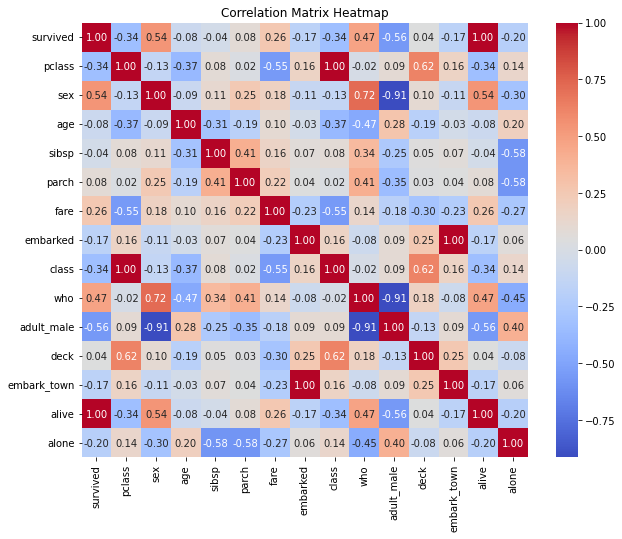

In [57]:
corr_matrix = ship_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


As the above heatmap shows, the correlation between `pclass` and `class` columns. This is because the `pclass` column is the numerical representation of the `class` column. The correlation between `embarked` and `embark_town` columns is also 1. This is because the `embarked` column is the numerical representation of the `embark_town` column. `survived` and `alive` columns have a correlation of 1. This is because the `survived` column is the numerical representation of `alive` column.   
Also `adult_male` column has a correlation of -0.91 with `sex` and `who` columns which is a strong negative correlation. This is because the `adult_male` column gives a combination of the `sex` and `who` columns' information.

### Delete the extra columns

In [58]:
ship_df_before_removing_extra_columns = ship_df.copy()

ship_df.drop(['class', 'embark_town', 'alive'], axis=1, inplace=True)

### How Many Passengers Survived the disaster?

In [59]:
survived_passengers =  ship_df[ship_df['survived'] == 1]
print("Number of survived passengers:", survived_passengers.shape[0])

Number of survived passengers: 342


### Female Passengers aged more than 30 years

In [60]:
female_passengers_over_30 = ship_df[(ship_df['sex'] == 1) & (ship_df['age'] > 30)]
print("Number of female passengers aged more than 30:", female_passengers_over_30.shape[0])

Number of female passengers aged more than 30: 103


### Passengers who embarked from Cherbourg and paid a fare greater than $100

In [61]:
cherbourg_high_fare_passengers = ship_df[(ship_df['embarked'] == 1) & (ship_df['fare'] > 100)]
display(cherbourg_high_fare_passengers)
print("Number of passengers who embarked from Cherbourg and paid more than 100$:", cherbourg_high_fare_passengers.shape[0])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
31,1,1,1,NaN,1,0,146.5208,1.0,1,False,2.0,False
118,0,1,0,24.0,0,1,247.5208,1.0,0,True,2.0,False
195,1,1,1,58.0,0,0,146.5208,1.0,1,False,2.0,True
215,1,1,1,31.0,1,0,113.2750,1.0,1,False,4.0,False
258,1,1,1,35.0,0,0,512.3292,1.0,1,False,NaN,True
299,1,1,1,50.0,0,1,247.5208,1.0,1,False,2.0,False
306,1,1,1,NaN,0,0,110.8833,1.0,1,False,NaN,True
307,1,1,1,17.0,1,0,108.9000,1.0,1,False,3.0,False
311,1,1,1,18.0,2,2,262.3750,1.0,1,False,2.0,False
319,1,1,1,40.0,1,1,134.5000,1.0,1,False,5.0,False


Number of passengers who embarked from Cherbourg and paid more than 100$: 29


### Replace Missing Values

At first we will check the number of missing values in each column. The `isnull()` method returns a DataFrame of the same shape as the original DataFrame, with `True` values for the missing values and `False` values for the non-missing values. The `sum()` method is then used to count the number of missing values in each column.

In [62]:
ship_df_with_NaN = ship_df.copy()

missing_values = ship_df.isnull().sum()
missing_columns = ship_df.columns[ship_df.isnull().any()]
for column in missing_columns:
    print("Number of missing values in column", column, ":", missing_values[column])

Number of missing values in column age : 177
Number of missing values in column embarked : 2
Number of missing values in column deck : 688


As we can see, the columns `age`, `deck`, and `embark_town` have missing values. We have only 2 missing values in the `embarked` column. We will replace the missing values in this column with the most frequent value in the column. We will replace the missing values in the `age` column with the mean of the column. The missing values in `deck` column are not replaced because the column has more than 70% missing values so we will drop the column.

In [63]:
mean_age = ship_df['age'].mean()
ship_df['age'].fillna(mean_age, inplace=True)

mode_embarked = ship_df['embarked'].mode()[0]
ship_df['embarked'].fillna(mode_embarked, inplace=True)

ship_df.drop(columns=['deck'], inplace=True)

### Average Age of Passengers 

In [64]:
avg_age_passengers = ship_df['age'].mean()
avg_age_passengers_with_NaN = ship_df_with_NaN['age'].mean()
print("The average age of all passengers is:", avg_age_passengers)
print("The average age of all passengers with NaN values is:", avg_age_passengers_with_NaN)

female_passengers = ship_df[ship_df['sex'] == 1]
avg_age_female_passengers = female_passengers['age'].mean()
female_passengers_with_NaN = ship_df_with_NaN[ship_df_with_NaN['sex'] == 1]
avg_age_female_passengers_with_NaN = female_passengers_with_NaN['age'].mean()
print("\nThe average age of female passengers is:", avg_age_female_passengers)
print("The average age of female passengers with NaN values is:", avg_age_female_passengers_with_NaN)

male_passengers = ship_df[ship_df['sex'] == 0]
avg_age_male_passengers = male_passengers['age'].mean()
male_passengers_with_NaN = ship_df_with_NaN[ship_df_with_NaN['sex'] == 0]
avg_age_male_passengers_with_NaN = male_passengers_with_NaN['age'].mean()
print("\nThe average age of male passengers is:", avg_age_male_passengers)
print("The average age of male passengers with NaN values is:", avg_age_male_passengers_with_NaN)

The average age of all passengers is: 29.69911764705882
The average age of all passengers with NaN values is: 29.69911764705882

The average age of female passengers is: 28.21673004870738
The average age of female passengers with NaN values is: 27.915708812260537

The average age of male passengers is: 30.505824243042102
The average age of male passengers with NaN values is: 30.72664459161148


As is it obvious from the results, the average of male and female passengers do not change significantly after replacing the missing values in the `age` column because we replaced the missing values with the mean of the column. The average age for female passengers is about 2 years less than the average age for male passengers.

### Fair Paid and Survived Correlation

In [66]:
correlation = ship_df['fare'].corr(ship_df['survived'])
print("Correlation coefficient between fare paid and survival rate:", correlation)

fare_survived_summary = ship_df[['fare', 'survived']].groupby('survived').describe()
print("\nStatistical summary of fare paid by survival status:\n\n", fare_survived_summary)

Correlation coefficient between fare paid and survival rate: 0.2573065223849622

Statistical summary of fare paid by survival status:

            fare                                                          
          count       mean        std  min      25%   50%   75%       max
survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292


The correlation between the `fare` and `survived` columns is near 0.26 which is a weak positive correlation. We also see the statistical summary of the `fare` column based on the `survived` column. The mean fare paid by the passengers who survived is about 48.4 and the mean fare paid by the passengers who did not survive is about 22.1. Also other statistical values shows that the fare paid by survived passengers is higher than the fare paid by the passengers who did not survive.

### Proportion of Passengers that Survived by Class

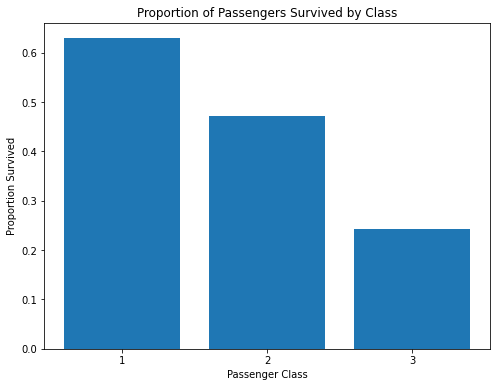

Number of passengers survived in class 1: 0.6296296296296297
Number of passengers survived in class 2: 0.47282608695652173
Number of passengers survived in class 3: 0.24236252545824846


In [100]:
survived_by_class = ship_df[ship_df['survived'] == 1].groupby('pclass').size()
total_by_class = ship_df['pclass'].value_counts()
proportion_survived = survived_by_class / total_by_class

plt.figure(figsize=(8, 6))
plt.bar(proportion_survived.index, proportion_survived.values)
plt.xlabel('Passenger Class')
plt.ylabel('Proportion Survived')
plt.xticks([1, 2, 3])
plt.title('Proportion of Passengers Survived by Class')
plt.show()

As we can see from the results, the proportion of passengers that survived in the first class is about 63%, in the second class is about 47%, and in the third class is about 24%. The passengers in the first class have the highest survival rate and the passengers in the third class have the lowest survival rate.

### Age Distribution of Passengers based on Survived and Not Survived

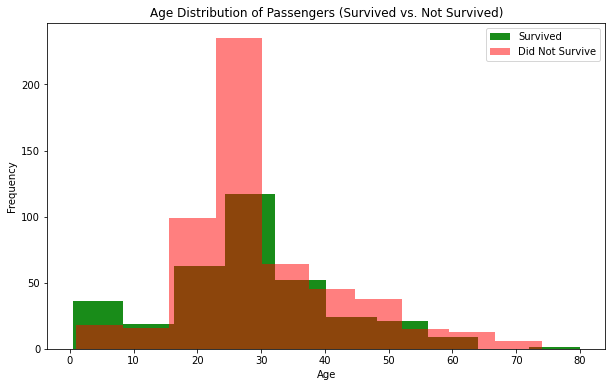

In [102]:
survived_passengers = ship_df[ship_df['survived'] == 1]
not_survived_passengers = ship_df[ship_df['survived'] == 0]

plt.figure(figsize=(10, 6))
plt.hist(survived_passengers['age'], color='green', alpha=0.9, label='Survived')
plt.hist(not_survived_passengers['age'], color='red', alpha=0.5, label='Did Not Survive')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Passengers (Survived vs. Not Survived)')
plt.legend()
plt.show()

We can see from the results that the age distribution of passengers who survived and did not survive is almost the same. The  survived children aged 0-10 are more than the children who did not survive. The passengers aged 20-30 have the highest number of passengers who did not survive. The passengers aged 25-31 have the highest number of passengers who survived.

### Scatter Plot Showing the Relationship between Age and Fare paid, color-coded by Survival

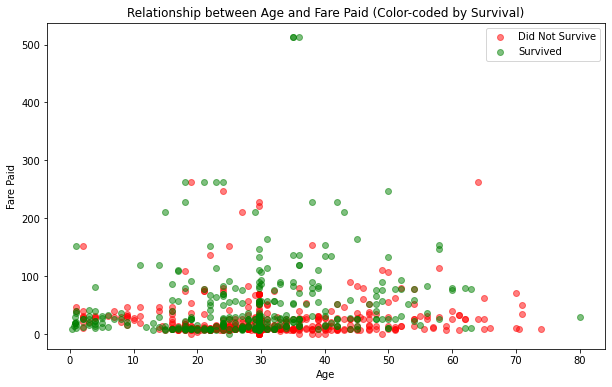

In [85]:
colors = {0: 'red', 1: 'green'}

plt.figure(figsize=(10, 6))
for survival_status, group in ship_df.groupby('survived'):
    plt.scatter(group['age'], group['fare'], c=colors[survival_status], label='Survived' if survival_status == 1 else 'Did Not Survive', alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Fare Paid')
plt.title('Relationship between Age and Fare Paid (Color-coded by Survival)')
plt.legend()
plt.show()

The scatter plot above shows that the passengers who paid higher fares have a higher survival rate. This kind of plot is useful to see the relationship between two numerical columns and how they are affected by a third column. Also it is obvious that the passengers aged higher than 60 have a lower survival rate.

### Pivot Table Showing the Average Fare and Survival Rate for each Class and Sex

In [99]:
def survival_rate(series):
    return sum(series) / len(series)

ship_df_with_categorical = ship_df.copy()
ship_df_with_categorical['sex'] = ship_df['sex'].replace({0: 'male', 1: 'female'}, inplace=False)
pivot_table = ship_df_with_categorical.pivot_table(index='pclass', columns='sex', values=['fare', 'survived'], aggfunc={'fare': 'mean', 'survived': survival_rate})
display(pivot_table)

fare             survived          
sex         female       male    female      male
pclass                                           
1       106.125798  67.226127  0.968085  0.368852
2        21.970121  19.741782  0.921053  0.157407
3        16.118810  12.661633  0.500000  0.135447

As the pivot table shows, the average fare paid by the female passengers in the first class is about 106.1 and the survival rate is about 96% which is the highest survival rate and fare paid. The fair paid and survival rate decreases as we move from the first class to the third class for all passengers including male and female. The lowest survival rate is 13% which is for the male passengers in the third class. In total the average fare paid by female passengers and also survival rate is significantly higher than male passengers.

### Grouped Bar Chart showing the average fare paid by passengers, grouped by their Class and Survival Status.

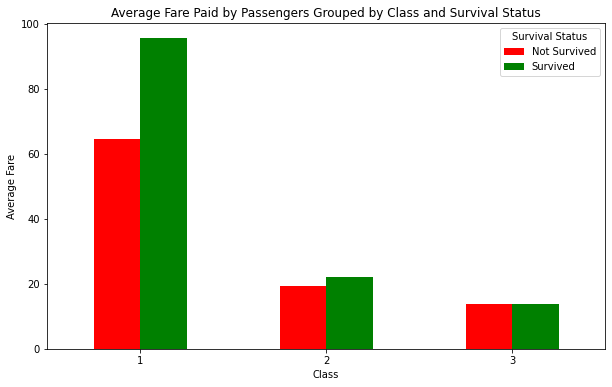

In [103]:
grouped_data = ship_df.groupby(['pclass', 'survived'])['fare'].mean().unstack()

colors = ['red', 'green']
grouped_data.plot(kind='bar', figsize=(10, 6), color=colors)
plt.xlabel('Class')
plt.ylabel('Average Fare')
plt.title('Average Fare Paid by Passengers Grouped by Class and Survival Status')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], title='Survival Status')
plt.show()

The above grouped bar chart shows the average fare paid by passengers grouped by their class and survival status. The first-class passengers who survived paid the highest fare and the third-class passengers who did not survive paid the lowest fare. The rate ot survival is significantly higher for the passengers who paid higher fares in first class. Also the passengers who paid higher fares have a higher survival rate in second class but in third class the survival rate is almost the same for all passengers.